In [1]:
print("test")

test


In [2]:
import pandas as pd

In [6]:
# Specify the path to your file
file_path = 'antibiogram_phenotype.txt'

# Read the file into a pandas DataFrame
df = pd.read_csv(file_path, sep='\t')

# Display the first few rows of the DataFrame
print(df['antibiotics'].unique())

['ertapenem' 'amikacin' 'cefepime' 'cefotaxime' 'ceftazidime' 'gentamicin'
 'imipenem' 'levofloxacin' 'meropenem' 'trimethoprim-sulfamethoxazole'
 'ciprofloxacin' 'doripenem' 'tobramycin' 'cefoxitin'
 'ampicillin-sulbactam' 'amoxicillin-clavulanic acid' 'ampicillin'
 'ceftiofur' 'ceftriaxone' 'chloramphenicol' 'kanamycin' 'tetracycline'
 'amoxicillin' 'cefuroxime' 'clindamycin' 'erythromycin'
 'piperacillin-tazobactam' 'cefazolin' 'aztreonam']


In [7]:
print(len(list(df['antibiotics'].unique())))

29


In [8]:
print("Shape of the DataFrame:", df.shape)
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())


print("\nSummary Statistics:")
print(df.describe(include='all'))

Shape of the DataFrame: (29187, 4)

Data Types:
sample_id       int64
bacteria       object
antibiotics    object
phenotype      object
dtype: object

Missing Values:
sample_id      0
bacteria       0
antibiotics    0
phenotype      0
dtype: int64

Summary Statistics:
           sample_id             bacteria   antibiotics    phenotype
count   2.918700e+04                29187         29187        29187
unique           NaN                    9            29            2
top              NaN  Salmonella enterica  tetracycline  susceptible
freq             NaN                13004          2532        18396
mean    4.560959e+06                  NaN           NaN          NaN
std     1.064071e+06                  NaN           NaN          NaN
min     1.163409e+06                  NaN           NaN          NaN
25%     3.894336e+06                  NaN           NaN          NaN
50%     4.487149e+06                  NaN           NaN          NaN
75%     5.201598e+06                  NaN

In [9]:
print("\nUnique values in 'bacteria':", df['bacteria'].unique())
print("\nUnique values in 'antibiotics':", df['antibiotics'].unique())
print("\nUnique values in 'phenotype':", df['phenotype'].unique())


print("\nPhenotype Distribution:")
print(df['phenotype'].value_counts())


Unique values in 'bacteria': ['Enterobacter cloacae' 'Klebsiella pneumoniae' 'Klebsiella aerogenes'
 'Acinetobacter baumannii' 'Salmonella enterica' 'Escherichia coli'
 'Streptococcus pneumoniae' 'Pseudomonas aeruginosa'
 'Staphylococcus aureus']

Unique values in 'antibiotics': ['ertapenem' 'amikacin' 'cefepime' 'cefotaxime' 'ceftazidime' 'gentamicin'
 'imipenem' 'levofloxacin' 'meropenem' 'trimethoprim-sulfamethoxazole'
 'ciprofloxacin' 'doripenem' 'tobramycin' 'cefoxitin'
 'ampicillin-sulbactam' 'amoxicillin-clavulanic acid' 'ampicillin'
 'ceftiofur' 'ceftriaxone' 'chloramphenicol' 'kanamycin' 'tetracycline'
 'amoxicillin' 'cefuroxime' 'clindamycin' 'erythromycin'
 'piperacillin-tazobactam' 'cefazolin' 'aztreonam']

Unique values in 'phenotype': ['resistant' 'susceptible']

Phenotype Distribution:
susceptible    18396
resistant      10791
Name: phenotype, dtype: int64


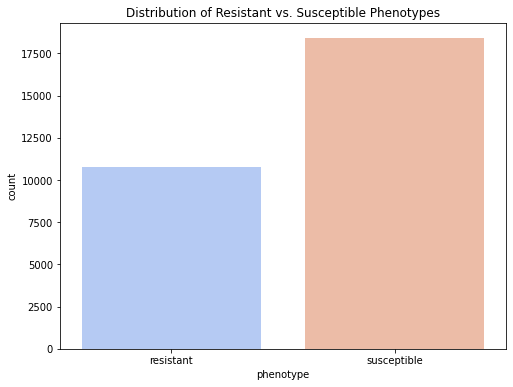

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Countplot for Phenotype
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='phenotype', palette='coolwarm')
plt.title('Distribution of Resistant vs. Susceptible Phenotypes')
plt.show()



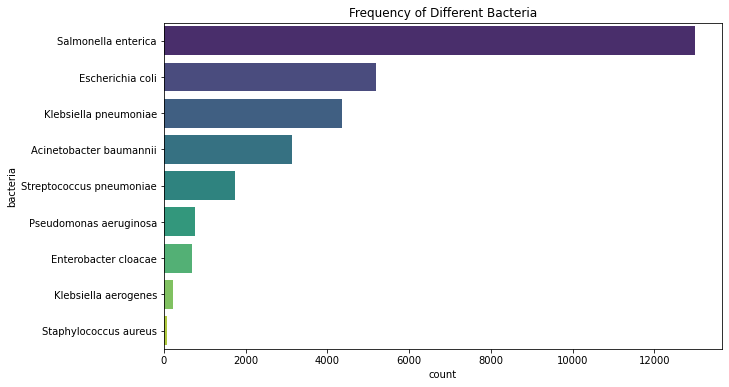

In [12]:
#Distribution of Bacteria
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='bacteria', order=df['bacteria'].value_counts().index, palette='viridis')
plt.title('Frequency of Different Bacteria')
plt.show()


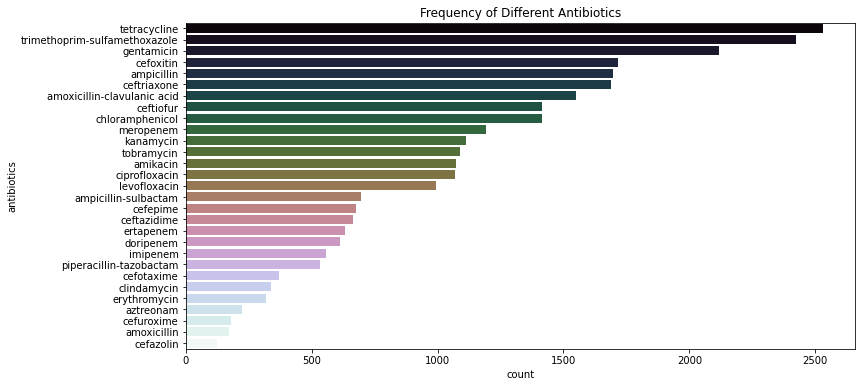

In [13]:
#Distribution of Antibiotics
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='antibiotics', order=df['antibiotics'].value_counts().index, palette='cubehelix')
plt.title('Frequency of Different Antibiotics')
plt.show()


phenotype                      resistant  susceptible
antibiotics                                          
amikacin                             146          929
amoxicillin                            4          167
amoxicillin-clavulanic acid          389         1159
ampicillin                           768          929
ampicillin-sulbactam                 307          389
aztreonam                            164           60
cefazolin                            110           13
cefepime                             449          229
cefotaxime                           339           33
cefoxitin                            455         1263
ceftazidime                          557          108
ceftiofur                            277         1139
ceftriaxone                          527         1163
cefuroxime                            17          161
chloramphenicol                       99         1314
ciprofloxacin                        768          300
clindamycin                 

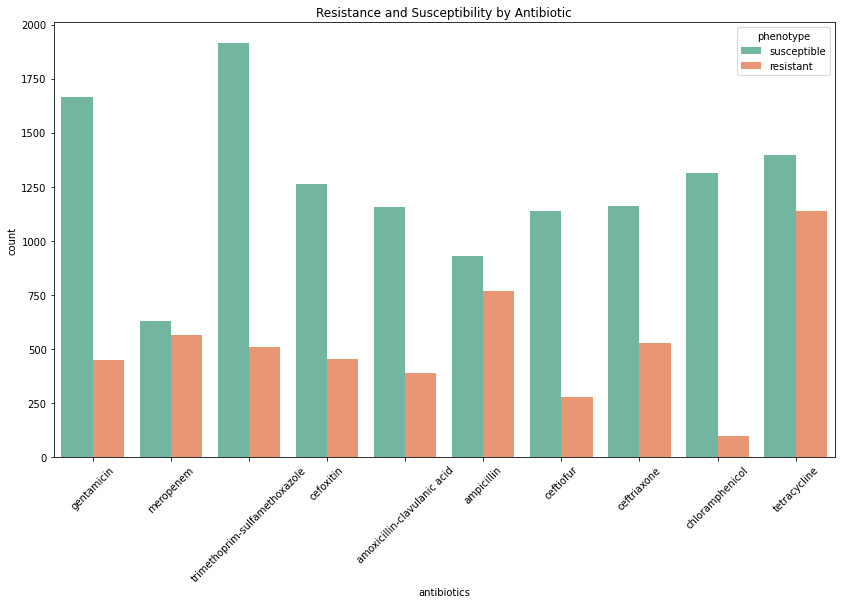

In [18]:
# Step 7: Group data by antibiotics and phenotype
resistance_by_antibiotic = df.groupby(['antibiotics', 'phenotype']).size().unstack(fill_value=0)
print(resistance_by_antibiotic)

# Plot resistance for top antibiotics
top_antibiotics = df['antibiotics'].value_counts().head(10).index

plt.figure(figsize=(14, 8))
sns.countplot(data=df[df['antibiotics'].isin(top_antibiotics)], x='antibiotics', hue='phenotype', palette='Set2')
plt.title('Resistance and Susceptibility by Antibiotic')
plt.xticks(rotation=45)
plt.show()

In [15]:
df.head()

,sample_id,bacteria,antibiotics,phenotype
0,1163409,Enterobacter cloacae,ertapenem,resistant
1,2141705,Klebsiella pneumoniae,amikacin,susceptible
2,2141705,Klebsiella pneumoniae,cefepime,resistant
3,2141705,Klebsiella pneumoniae,cefotaxime,resistant
4,2141705,Klebsiella pneumoniae,ceftazidime,resistant
